In [1]:
# Preamble
import numpy as np
import glob
import matplotlib
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import os


In [53]:
scale_factor = 1000000 #MPa

# For the fault figure
cmax_f =   8000000 / scale_factor
cmin_f =  -8000000 / scale_factor
levels = np.linspace(cmin_f, cmax_f, 16)
colors_l = 'w'


cx_f, xx_f, yy_f = np.loadtxt('vertx0.ts', delimiter=' ', usecols=(0, 1, 2), unpack=True)
tri1, tri2, tri3 = np.loadtxt('triang0.ts', dtype=int, delimiter=' ', usecols=(0, 1, 2), unpack=True)
cx_f = cx_f/100000
xx_f = xx_f/1000
yy_f = yy_f/1000
mu_s = 0.6

tria = []
for i in range(len(tri1)):
    tria.append([tri1[i]-1, tri2[i]-1, tri3[i]-1])

triangles = np.asarray(tria)
# read the files
list_files_m = glob.glob('output_offm2p5_gapm5p0n/offm2p5_gapm5p0-faultreceivern*.dat')
list_files_p = glob.glob('output_offm2p5_gapp5p0n/offm2p5_gapp5p0-faultreceivern*.dat')
list_files_m.sort()
list_files_p.sort()
n_files = len(list_files_m)
n_cols = 20
n_steps = 81

k = 0
count = 0
data_m = np.zeros((n_files,n_steps,n_cols), dtype=np.float64)
data_p = np.zeros((n_files,n_steps,n_cols), dtype=np.float64)
for f in range(len(list_files_m)):
    infile_m = open(list_files_m[f],'r')
    infile_p = open(list_files_p[f],'r')
    dat_m = infile_m.read()
    vals_m = dat_m.split("\n")
    dat_p = infile_p.read()
    vals_p = dat_p.split("\n")
    for i in range(n_steps):
        val_m = vals_m[i].split(" ")
        val_p = vals_p[i].split(" ")
        for j in range(n_cols):
            data_m[k][i][j] = float(val_m[j])
            data_p[k][i][j] = float(val_p[j])
    infile_m.close()
    infile_p.close()
    k += 1

xx_m = xx_f[triangles].mean(axis = 1)
yy_m = yy_f[triangles].mean(axis = 1)


rec fault coords:  3.5464832302000002 47.412710813 -2.0
rec fault coords:  3.5592970817 47.369581454999995 -2.0
rec coords:  3.57766631 47.368442800000004 -3.0
output_h_plus/lines_00006.dat


/tmp/ipykernel_14957/187967189.py:551: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['47.35','47.35','47.40'])


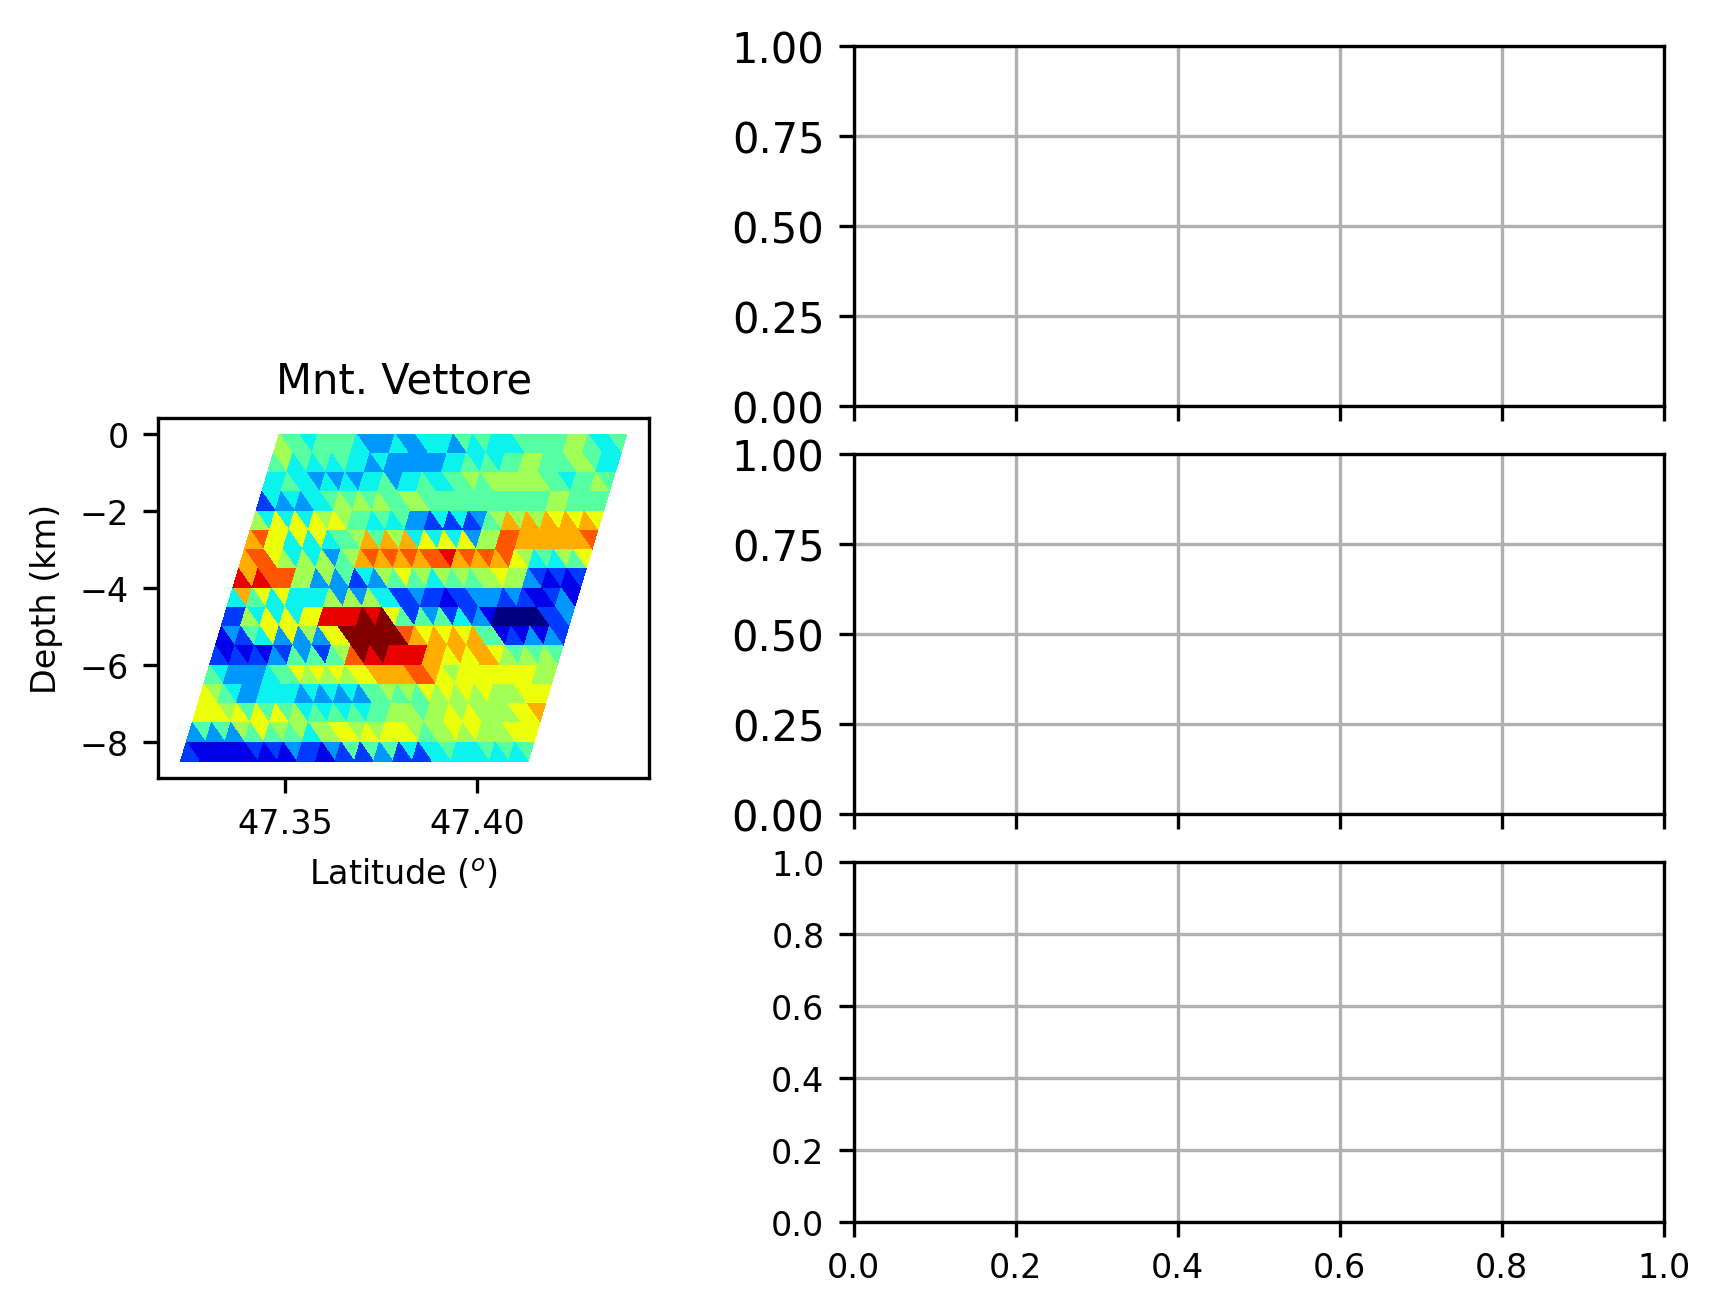

In [132]:
fontz = 8

# Load the virtual receiver coordinates (horizontal)
xx = np.loadtxt('xx_coord.dat', usecols=(0), unpack=True)
yy = np.loadtxt('yy_coord.dat', usecols=(0), unpack=True)

xx = xx / 100000
yy = yy / 100000


x_p, y_p = np.loadtxt('prof_vet.dat', usecols=(0, 1), unpack=True)
x_p = x_p / 100000.
y_p = y_p / 100000.

x_p2, y_p2 = np.loadtxt('prof_vet_2.dat', usecols=(0, 1), unpack=True)
x_p2 = x_p2 / 100000.
y_p2 = y_p2 / 100000.
z_p2 = np.linspace(0,-14.500,30)


vet_trace = np.loadtxt('vettore_trace_3k_depth.dat', delimiter=' ', usecols=(0,1), unpack=True)
lag_trace = np.loadtxt('llaga_trace_overlap.dat', delimiter=' ', usecols=(0,1), unpack=True)
lag_trace_p5 = np.loadtxt('llaga_p5_3k.dat', delimiter=' ', usecols=(0,1), unpack=True)
lag_trace_m5 = np.loadtxt('llaga_m5_3k.dat', delimiter=' ', usecols=(0,1), unpack=True)

vet_trace = vet_trace / 100000
lag_trace = lag_trace / 100000
lag_trace_m5 = lag_trace_m5 / 100000
lag_trace_p5 = lag_trace_p5 / 100000

# Strike vector
stk_v = [-0.43051,   0.90259,   0.00000];
stk_v = np.array(stk_v)
a = [349584,  4.74132e+6,  -8500];
b = [354640,  4.74373e+6,  -500];
a = np.array(a)
b = np.array(b)
# Dip vector
dip_v = (a-b)/np.linalg.norm(a-b);

# Normal vector to the fault
n_v = np.cross(stk_v,dip_v);
n_v = n_v/np.linalg.norm(n_v);
n = n_v

# Static coefficient
mu_s = 0.6

# Rotation matrix
matrix = np.array([dip_v,stk_v,n_v])

# List of files
snaps_list = glob.glob('output_h_plus/lines_00006.dat')
snaps_list.sort()


# Read a given receiver and check the CFF time series at that receiver location
rec_id_fault = 19*4 + 15
rec_id_fault_2 = 19*6 + 7
path = 'output_offm2p5_gapm5p0n/offm2p5_gapm5p0-faultreceiver-'
file_name = path + str(rec_id_fault).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines = fin.readlines()
x_rec_f = float(lines[2].split("       ")[1])/100000
y_rec_f = float(lines[3].split("       ")[1])/100000
z_rec_f = float(lines[4].split("      ")[1])/1000
print("rec fault coords: ",x_rec_f,y_rec_f,z_rec_f)

path = 'output_offm2p5_gapm5p0n/offm2p5_gapm5p0-faultreceiver-'
file_name = path + str(rec_id_fault_2).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines = fin.readlines()
x_rec_f_2 = float(lines[2].split("       ")[1])/100000
y_rec_f_2 = float(lines[3].split("       ")[1])/100000
z_rec_f_2 = float(lines[4].split("      ")[1])/1000
print("rec fault coords: ",x_rec_f_2,y_rec_f_2,z_rec_f)



# Horizontal dimension
nx = 40;
ny = 55;

# Dimension vertical profile
nstk = 31;
nz = 30;

stk = np.linspace(0,500*(nstk-1),31)
zz = np.linspace(-500*(nz-1) + 500,500,30)

stk = stk / 1000;
zz = zz / 1000;

dt_stamp = 0.1   # sampling of output files
delay_samp = 6   # lines of header

# FOR THE RECEIVER PLOT

# Read a given receiver and check the CFF time series at that receiver location
rec_id = 31*6 + 18
path = 'output_v_plus_vet/offm2p5_gapp5p0-receiver-'
file_name = path + str(rec_id).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines_2 = fin.readlines()
path = 'output_v_plus_vet_f/offm2p5_gapm5p0-receiver-'
file_name = path + str(rec_id).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines = fin.readlines()
x_rec = float(lines[2].split("       ")[1])/100000
y_rec = float(lines[3].split("       ")[1])/100000
z_rec = float(lines[4].split("       ")[1])/1000
print("rec coords: ",x_rec,y_rec,z_rec)
nt = len(lines)-5
time_rec = np.zeros((nt))
sxx_rec = np.zeros((nt))
syy_rec = np.zeros((nt))
szz_rec = np.zeros((nt))
sxy_rec = np.zeros((nt))
syz_rec = np.zeros((nt))
sxz_rec = np.zeros((nt))
u_rec = np.zeros((nt))
v_rec = np.zeros((nt))
w_rec = np.zeros((nt))
t1_rec = np.zeros((nt))
t2_rec = np.zeros((nt))
t3_rec = np.zeros((nt))
s1_rec = np.zeros((nt))
s2_rec = np.zeros((nt))
s3_rec = np.zeros((nt))
delta_tau_rec = np.zeros((nt))
delta_sig_rec = np.zeros((nt))
delta_cff_rec = np.zeros((nt))

time_rec_2 = np.zeros((nt))
sxx_rec_2 = np.zeros((nt))
syy_rec_2 = np.zeros((nt))
szz_rec_2 = np.zeros((nt))
sxy_rec_2 = np.zeros((nt))
syz_rec_2 = np.zeros((nt))
sxz_rec_2 = np.zeros((nt))
u_rec_2 = np.zeros((nt))
v_rec_2 = np.zeros((nt))
w_rec_2 = np.zeros((nt))
t1_rec_2 = np.zeros((nt))
t2_rec_2 = np.zeros((nt))
t3_rec_2 = np.zeros((nt))
s1_rec_2 = np.zeros((nt))
s2_rec_2 = np.zeros((nt))
s3_rec_2 = np.zeros((nt))
delta_tau_rec_2 = np.zeros((nt))
delta_sig_rec_2 = np.zeros((nt))
delta_cff_rec_2 = np.zeros((nt))

max_c = []
min_c = []
for i in range(nt):
    time_rec[i] = lines[i+5].split("  ")[1]
    sxx_rec[i] = lines[i+5].split("  ")[2]
    syy_rec[i] = lines[i+5].split("  ")[3]
    szz_rec[i] = lines[i+5].split("  ")[4]
    sxy_rec[i] = lines[i+5].split("  ")[5]
    syz_rec[i] = lines[i+5].split("  ")[6]
    sxz_rec[i] = lines[i+5].split("  ")[7]
    u_rec[i] = lines[i+5].split("  ")[8]
    v_rec[i] = lines[i+5].split("  ")[9]
    w_rec[i] = lines[i+5].split("  ")[10]
    sig_rec = np.array([[sxx_rec[i], sxy_rec[i], sxz_rec[i]], [sxy_rec[i], syy_rec[i], syz_rec[i]], [sxz_rec[i], syz_rec[i], szz_rec[i]]])
    t = sig_rec.dot(n)
    # Shear and normal stress
    tau = t - (np.dot(n,t))*n
    sigma = np.dot(n,t)*n
    # Rotated vectors
    taup = matrix.dot(tau)
    sigmap = matrix.dot(sigma)
    t1_rec[i] = taup[0]
    t2_rec[i] = taup[1]
    t3_rec[i] = taup[2]
    s1_rec[i] = sigmap[0]
    s2_rec[i] = sigmap[1]
    s3_rec[i] = sigmap[2]
    delta_tau_rec[i] = t1_rec[i]            
    #%multiply delta_sigma by -1 to change the seissol convention (negative = compression)
    delta_sig_rec[i] = -1.0*sigmap[2]
    delta_cff_rec[i] = delta_tau_rec[i] + mu_s*delta_sig_rec[i]

    time_rec_2[i] = lines_2[i+5].split("  ")[1]
    sxx_rec_2[i] = lines_2[i+5].split("  ")[2]
    syy_rec_2[i] = lines_2[i+5].split("  ")[3]
    szz_rec_2[i] = lines_2[i+5].split("  ")[4]
    sxy_rec_2[i] = lines_2[i+5].split("  ")[5]
    syz_rec_2[i] = lines_2[i+5].split("  ")[6]
    sxz_rec_2[i] = lines_2[i+5].split("  ")[7]
    u_rec_2[i] = lines_2[i+5].split("  ")[8]
    v_rec_2[i] = lines_2[i+5].split("  ")[9]
    w_rec_2[i] = lines_2[i+5].split("  ")[10]
    sig_rec = np.array([[sxx_rec_2[i], sxy_rec_2[i], sxz_rec_2[i]], [sxy_rec_2[i], syy_rec_2[i], syz_rec_2[i]], [sxz_rec_2[i], syz_rec_2[i], szz_rec_2[i]]])
    t = sig_rec.dot(n)
    # Shear and normal stress
    tau = t - (np.dot(n,t))*n
    sigma = np.dot(n,t)*n
    # Rotated vectors
    taup = matrix.dot(tau)
    sigmap = matrix.dot(sigma)
    t1_rec_2[i] = taup[0]
    t2_rec_2[i] = taup[1]
    t3_rec_2[i] = taup[2]
    s1_rec_2[i] = sigmap[0]
    s2_rec_2[i] = sigmap[1]
    s3_rec_2[i] = sigmap[2]
    delta_tau_rec_2[i] = t1_rec_2[i]            
    #%multiply delta_sigma by -1 to change the seissol convention (negative = compression)
    delta_sig_rec_2[i] = -1.0*sigmap[2]
    delta_cff_rec_2[i] = delta_tau_rec_2[i] + mu_s*delta_sig_rec_2[i]

max_cff_rec = np.abs(np.max(delta_cff_rec_2)/1000000)
min_cff_rec = np.abs(np.min(delta_cff_rec_2)/1000000)
abs_cff_rec = np.max([max_cff_rec, min_cff_rec])
max_cff_rec = abs_cff_rec
min_cff_rec = -1.*abs_cff_rec

mm = []
mp = []

counter = 0
T_rec_m = []
P_rec_m = []
T_rec_p = []
P_rec_p = []
T_rec_m_2 = []
P_rec_m_2 = []
T_rec_p_2 = []
P_rec_p_2 = []
SRd_m_rec = []
SRd_p_rec = []
SRd_m_rec_2 = []
SRd_p_rec_2 = []

nxv = 31
nyv = 30

for it in snaps_list:
    time_stamp = ( float(it.split("/")[1][-8:-4]) - delay_samp ) * dt_stamp
    time_lim =  int(it.split("/")[1][-8:-4]) - delay_samp
    print(it)
    # Cut recording for the receiver plot
    ttime_rec = time_rec[0:time_lim]
    ddelta_cff_rec = delta_cff_rec[0:time_lim]
    ttime_rec_2 = time_rec_2[0:time_lim]
    ddelta_cff_rec_2 = delta_cff_rec_2[0:time_lim]
    time_stamp_title = "Time: " + format(0.2*counter, '.1f') + ' s'
    it_compare = 'output_h_plus_f/' + it.split("/")[1]
    it_v1_compare = 'output_v_plus_vet/' + it.split("/")[1]
    it_v2_compare = 'output_v_plus_vet_f/' + it.split("/")[1]
    out1 = 'horizontal_delta_' + str(counter).zfill(5) + '.png'

    # TRIANGLES DATA
    ##########################################
    col_Td = 4
    col_Td0 = 10
    col_Pn = 5
    fileout = 'fault_' + str(counter).zfill(5) + '.png'
    T_d_m = []
    P_n_m = []
    T_d_p = []
    P_n_p = []
    T_d0_m = []
    T_d0_p = []
    SRd_p = []
    SRd_m = []
    for i in range(len(xx_f)):
        # T_d column 4
        # P_n column 5
        T_d_m.append(data_m[i][counter][col_Td])
        P_n_m.append(data_m[i][counter][col_Pn])
        T_d_p.append(data_p[i][counter][col_Td])
        P_n_p.append(data_p[i][counter][col_Pn])
        T_d0_m.append(data_m[i][counter][col_Td0])
        T_d0_p.append(data_p[i][counter][col_Td0])
        SRd_p.append(data_p[i][counter][13])  # 2 SRd, 13 Sld
        SRd_m.append(data_m[i][counter][13])
    # Receiver on fault #1
    T_rec_m.append(data_m[rec_id_fault][counter][col_Td])
    P_rec_m.append(data_m[rec_id_fault][counter][col_Pn])    
    T_rec_p.append(data_p[rec_id_fault][counter][col_Td])
    P_rec_p.append(data_p[rec_id_fault][counter][col_Pn])    
    T_rec_m_arr = np.asarray(T_rec_m)
    P_rec_m_arr = np.asarray(P_rec_m)
    T_rec_p_arr = np.asarray(T_rec_p)
    P_rec_p_arr = np.asarray(P_rec_p)
    tt = np.linspace(0,(counter*0.2),counter+1)
    D_cff_rec_m = T_rec_m_arr - mu_s * P_rec_m_arr
    D_cff_rec_p = T_rec_p_arr - mu_s * P_rec_p_arr    
    # Receiver on fault #2
    T_rec_m_2.append(data_m[rec_id_fault_2][counter][col_Td])
    P_rec_m_2.append(data_m[rec_id_fault_2][counter][col_Pn])    
    T_rec_p_2.append(data_p[rec_id_fault_2][counter][col_Td])
    P_rec_p_2.append(data_p[rec_id_fault_2][counter][col_Pn])    
    T_rec_m_2_arr = np.asarray(T_rec_m_2)
    P_rec_m_2_arr = np.asarray(P_rec_m_2)
    T_rec_p_2_arr = np.asarray(T_rec_p_2)
    P_rec_p_2_arr = np.asarray(P_rec_p_2)
    D_cff_rec_m_2 = T_rec_m_2_arr - mu_s * P_rec_m_2_arr
    D_cff_rec_p_2 = T_rec_p_2_arr - mu_s * P_rec_p_2_arr    
    SRd_m_rec.append(data_m[rec_id_fault][counter][2])
    SRd_p_rec.append(data_p[rec_id_fault][counter][2])
    SRd_m_rec_2.append(data_m[rec_id_fault_2][counter][2])
    SRd_p_rec_2.append(data_p[rec_id_fault_2][counter][2])

    SRd_p_rec_2_arr = np.asarray(SRd_p_rec_2)
    SRd_m_rec_2_arr = np.asarray(SRd_m_rec_2)
    SRd_p_rec_arr = np.asarray(SRd_p_rec)
    SRd_m_rec_arr = np.asarray(SRd_m_rec)
    
    
    T_d_m = np.asarray(T_d_m)
    P_n_m = np.asarray(P_n_m) * -1. # seissol convention test
    T_d_p = np.asarray(T_d_p)
    P_n_p = np.asarray(P_n_p) * -1.
    D_cff_m = T_d_m - mu_s * P_n_m
    D_cff_p = T_d_p - mu_s * P_n_p
    D_cff_m = D_cff_m / scale_factor
    D_cff_p = D_cff_p / scale_factor
    T_d0_m = np.asarray(T_d0_m)
    T_d0_p = np.asarray(T_d0_p)

    
    
    SRd_m = np.asarray(SRd_m)
    SRd_p = np.asarray(SRd_p)
    #max_c_m.append(max(D_cff_m))
    #min_c_m.append(min(D_cff_m))
    #max_c_p.append(max(D_cff_p))
    #min_c_p.append(min(D_cff_p))
    zfaces_m_sr = SRd_m[triangles].mean(axis = 1) #D_cff_m[triangles].mean(axis = 1)
    zfaces_p_sr = SRd_p[triangles].mean(axis = 1) #D_cff_p[triangles].mean(axis = 1)
    zfaces_m_cff = D_cff_m[triangles].mean(axis = 1) #D_cff_m[triangles].mean(axis = 1)
    zfaces_p_cff = D_cff_p[triangles].mean(axis = 1) #D_cff_p[triangles].mean(axis = 1)
    zfaces_m_Td0 = T_d0_m[triangles].mean(axis = 1) #D_cff_p[triangles].mean(axis = 1)
    zfaces_p_Td0 = T_d0_p[triangles].mean(axis = 1) #D_cff_p[triangles].mean(axis = 1)
    ########################################

    counter = counter + 1

    #Load the data horizontal
    time_hm, sxx_hm, syy_hm, szz_hm, sxy_hm, syz_hm, sxz_hm, u_hm, v_hm, w_hm = np.loadtxt(it_compare, delimiter=' ', usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)

    #Load the data horizontal
    time_hp, sxx_hp, syy_hp, szz_hp, sxy_hp, syz_hp, sxz_hp, u_hp, v_hp, w_hp = np.loadtxt(it, delimiter=' ', usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)

    #Load the data horizontal
    time_vp, sxx_vp, syy_vp, szz_vp, sxy_vp, syz_vp, sxz_vp, u_vp, v_vp, w_vp = np.loadtxt(it_v1_compare, delimiter=' ', usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)

    #Load the data horizontal
    time_vm, sxx_vm, syy_vm, szz_vm, sxy_vm, syz_vm, sxz_vm, u_vm, v_vm, w_vm = np.loadtxt(it_v2_compare, delimiter=' ', usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)

    
    # Save space for variables
    t1_hm = np.zeros((ny,nx))
    t2_hm = np.zeros((ny,nx))
    t3_hm = np.zeros((ny,nx))
    s1_hm = np.zeros((ny,nx))
    s2_hm = np.zeros((ny,nx))
    s3_hm = np.zeros((ny,nx))
    delta_tau_hm = np.zeros((ny,nx))
    delta_sig_hm = np.zeros((ny,nx))
    delta_cff_hm = np.zeros((ny,nx))
    uhm = np.zeros((ny,nx))
    vhm = np.zeros((ny,nx))
    whm = np.zeros((ny,nx))

    # Save space for variables
    t1_hp = np.zeros((ny,nx))
    t2_hp = np.zeros((ny,nx))
    t3_hp = np.zeros((ny,nx))
    s1_hp = np.zeros((ny,nx))
    s2_hp = np.zeros((ny,nx))
    s3_hp = np.zeros((ny,nx))
    delta_tau_hp = np.zeros((ny,nx))
    delta_sig_hp = np.zeros((ny,nx))
    delta_cff_hp = np.zeros((ny,nx))
    uhp = np.zeros((ny,nx))
    vhp = np.zeros((ny,nx))
    whp = np.zeros((ny,nx))

    
    # Save space for variables
    t1_vm = np.zeros((nxv,nyv))
    t2_vm = np.zeros((nxv,nyv))
    t3_vm = np.zeros((nxv,nyv))
    s1_vm = np.zeros((nxv,nyv))
    s2_vm = np.zeros((nxv,nyv))
    s3_vm = np.zeros((nxv,nyv))
    delta_tau_vm = np.zeros((nxv,nyv))
    delta_sig_vm = np.zeros((nxv,nyv))
    delta_cff_vm = np.zeros((nxv,nyv))
    uvm = np.zeros((nxv,nyv))
    vvm = np.zeros((nxv,nyv))
    # Save space for variables
    t1_vp = np.zeros((nyv,nxv))
    t2_vp = np.zeros((nyv,nxv))
    t3_vp = np.zeros((nyv,nxv))
    s1_vp = np.zeros((nyv,nxv))
    s2_vp = np.zeros((nyv,nxv))
    s3_vp = np.zeros((nyv,nxv))
    delta_tau_vp = np.zeros((nyv,nxv))
    delta_sig_vp = np.zeros((nyv,nxv))
    delta_cff_vp = np.zeros((nyv,nxv))
    uvp = np.zeros((nyv,nxv))
    vvp = np.zeros((nyv,nxv))
    wvp = np.zeros((nyv,nxv))

    
    #invert order
    ndata_hm = len(time_hm);
    k = ndata_hm-1;
    n = n_v;
    ii = nx;
    for i in range(nx):
        jj = ny;
        for j in range(ny):
            sig_hm = np.array([[sxx_hm[k], sxy_hm[k], sxz_hm[k]], [sxy_hm[k], syy_hm[k], syz_hm[k]], [sxz_hm[k], syz_hm[k], szz_hm[k]]])
            t = sig_hm.dot(n)
            # Shear and normal stress
            tau = t - (np.dot(n,t))*n
            sigma = np.dot(n,t)*n
            # Rotated vectors
            taup = matrix.dot(tau)
            sigmap = matrix.dot(sigma)
            t1_hm[j][i] = taup[0]
            t2_hm[j][i] = taup[1]
            t3_hm[j][i] = taup[2]
            s1_hm[j][i] = sigmap[0]
            s2_hm[j][i] = sigmap[1]
            s3_hm[j][i] = sigmap[2]
            delta_tau_hm[j][i] = t1_hm[j][i]            
            #%multiply delta_sigma by -1 to change the seissol convention (negative = compression)
            delta_sig_hm[j][i] = -1.0*sigmap[2]
            delta_cff_hm[j][i] = delta_tau_hm[j][i] + mu_s*delta_sig_hm[j][i]
            uhm[j][i] = u_hm[k]
            vhm[j][i] = v_hm[k]
            whm[j][i] = w_hm[k]
            jj = jj-1
            k=k-1
    delta_cff_hm = delta_cff_hm / scale_factor
    mm.append(np.max(whm))
    
    #invert order
    ndata_hp = len(time_hp);
    k = ndata_hp-1;
    n = n_v;
    ii = nx;
    for i in range(nx):
        jj = ny;
        for j in range(ny):
            sig_hp = np.array([[sxx_hp[k], sxy_hp[k], sxz_hp[k]], [sxy_hp[k], syy_hp[k], syz_hp[k]], [sxz_hp[k], syz_hp[k], szz_hp[k]]])
            t = sig_hp.dot(n)
            # Shear and normal stress
            tau = t - (np.dot(n,t))*n
            sigma = np.dot(n,t)*n
            # Rotated vectors
            taup = matrix.dot(tau)
            sigmap = matrix.dot(sigma)
            t1_hp[j][i] = taup[0]
            t2_hp[j][i] = taup[1]
            t3_hp[j][i] = taup[2]
            s1_hp[j][i] = sigmap[0]
            s2_hp[j][i] = sigmap[1]
            s3_hp[j][i] = sigmap[2]
            delta_tau_hp[j][i] = t1_hp[j][i]            
            #%multiply delta_sigma by -1 to change the seissol convention (negative = compression)
            delta_sig_hp[j][i] = -1.0*sigmap[2]
            delta_cff_hp[j][i] = delta_tau_hp[j][i] + mu_s*delta_sig_hp[j][i]
            uhp[j][i] = u_hp[k]
            vhp[j][i] = v_hp[k]
            whp[j][i] = w_hp[k]
            jj = jj-1
            k=k-1
    delta_cff_hp = delta_cff_hp / scale_factor
    mp.append(np.max(whp))

    
    wvm = np.zeros((30,31))    
    wvp = np.zeros((30,31))    
    #invert order
    ndata_vm = len(time_vm);
    k = 929;
    n = n_v;
    for i in range(30):
        nnn = 29 - i
        for j in range(31):
            nnnn = 30 - j
            wvm[i][j] = v_vm[k]
            wvp[i][j] = v_vp[k]
            k=k-1

    
    
    # Figures    hf, ha = plt.subplots(3,2)

    ninter = 5
  # for contour plots
    c_max_d =  8000000 / scale_factor
    c_min_d = -8000000 / scale_factor
    
    c_min_s = -5000000
    c_max_s =  5000000
    
    c_min_w = -0.01
    c_max_w =  0.01
    
    
    inter_d = np.linspace(c_min_d,c_max_d,ninter)
    inter_s = np.linspace(c_min_s,c_max_s,ninter)
    inter_w = np.linspace(c_min_w,c_max_w,ninter)

    
    # DELTA PLOTS
    fig1, axs1 = plt.subplots(2, 5, dpi=300, facecolor='white')
    #fig1.suptitle(time_stamp_title, x=0.9, y=0.99, fontweight='bold')
    # delta tau
    # Delta CFF
    ax1 = axs1[0, 0]
    ax2 = axs1[1, 0]

    #ax3.set_position([0.35,0.1, 0.35, 0.35])

    
    c_max_d = 41000000#np.max(zfaces_m_Td0) #42015560.55366254 #np.max(zfaces_m_Td0)
    c_min_d =  5260000#np.min(zfaces_m_Td0) #5220899.503621422 #np.min(zfaces_p_Td0)
    levels = np.linspace(c_min_d, c_max_d, 12)
    cmap = matplotlib.cm.get_cmap('jet', 12)

    ax3 = axs1[0, 2]
    ax3.set_aspect('equal')
    ax3.set_title('Mnt. Vettore', fontsize=10)
    ax3.set_position([0.1,0.42, 0.3, 0.3])
    tpc_m = ax3.tripcolor(xx_f, yy_f, triangles,
                    facecolors = zfaces_m_Td0,
                    cmap = cmap,
                    edgecolors = 'None')
                    #shading = 'flat',
    #                vmax = c_max_d,
    #                vmin = c_min_d)
    #for i in range(342):
    #    T_d0_m_n = np.abs(levels - T_d0_m[i])
    #    min_id = np.where(T_d0_m_n == np.min(T_d0_m_n))[0][0]
        #print(min_id)
    #    ax3.scatter(xx_f[i], yy_f[i], 9, edgecolor='white', color=cmap(min_id/12))
    #ax3.scatter(y_rec_f_2*100, z_rec_f_2, 9, edgecolor='white', color='red')
    ax3.set_xlabel(r'Latitude ($^o$)', fontsize=fontz)
    ax3.set_xticklabels(['47.35','47.35','47.40'])
    ax3.set_ylabel('Depth (km)', fontsize=fontz)
    #cbaxes = fig1.add_axes([0.115, 0.24, 0.27, 0.02]) 
    #cb = fig1.colorbar(tpc_m, ax=ax3, cax=cbaxes, orientation='horizontal')
    #cb.set_label('Shear stress along dip (Pa)')
    
    ax4 = axs1[1, 2]
    ax4.set_position([0.5,0.05, 0.45, 0.3])
    #ax4.set_xticks([])
    ax4.grid()
    ax5 = axs1[1, 1]
    ax5.set_position([0.5,0.39, 0.45, 0.3])
    ax5.set_xticklabels([])
    ax5.grid()
    ax6 = axs1[0, 1]
    ax6.set_position([0.5,0.73, 0.45, 0.3])
    ax6.set_xticklabels([])
    ax6.grid()

    xxx = 3.564127460000
    yyy = -3
    yyy_a = 0
    xxx_a = xxx + ((np.abs(yyy_a-yyy)/110)/np.tan(55*np.pi/180))
    yyy_b = -8.5
    xxx_b = xxx - ((np.abs(yyy_b-yyy)/110)/np.tan(55*np.pi/180))
    xxx = [xxx_b, xxx, xxx_a]
    yyy = [yyy_b, yyy, yyy_a]
    

      
    axs1[0, 0].axis('off')
    axs1[1, 0].axis('off')
    axs1[0, 3].axis('off')
    axs1[0, 4].axis('off')
    #axs1[1, 1].axis('off')
    #axs1[0, 1].axis('off')
    #axs1[1, 2].axis('off')
    axs1[1, 3].axis('off')
    axs1[1, 4].axis('off')
    

    #ax1.tick_params(axis='both', which='major', labelsize=fontz)
    #ax2.tick_params(axis='both', which='major', labelsize=fontz)
    ax3.tick_params(axis='both', which='major', labelsize=fontz)
    ax4.tick_params(axis='both', which='major', labelsize=fontz)
    #ax5.tick_params(axis='both', which='major', labelsize=fontz)
    #ax6.tick_params(axis='both', which='major', labelsize=fontz)
    #cb.ax.tick_params(labelsize=fontz)
    
    
    #ax4.text(4743, -8.8, 'FW', horizontalalignment='center')
    #ax3.text(4743, -8.8, 'HW', horizontalalignment='center')
    #ax5.text(3.625, -14, 'HW', horizontalalignment='center')
    #ax6.text(3.625, -14, 'FW', horizontalalignment='center')

    fig1.savefig(out1)




In [120]:
T_d0_m_n = np.abs(levels - T_d0_m[50])
min_id = np.where(T_d0_m_n == np.min(T_d0_m_n))
print(min_id)
print(T_d0_m_n)
print(cmap(0))

(array([3]),)
[ 9156497.82775375  5907406.91866284  2658316.00957194   590774.89951897
  3839865.80860988  7088956.71770079 10338047.6267917  13587138.53588261
 16836229.44497352 20085320.35406443 23334411.26315534 26583502.17224625]
(0.0, 0.0, 0.5, 1.0)


In [103]:
levels

array([ 5260000., 12408000., 19556000., 26704000., 33852000., 41000000.])

In [33]:
np.min(zfaces_m_Td0)

0.0

In [34]:
zfaces_m_Td0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.